# Web scraping

scrape

    (v.) push or pull a hard or sharp implement across (a surface or object) so as to remove dirt or other matter.

web scraping จึงเป็นการ *กวาด* เอาข้อมูลต่างๆ ที่อยู่บนเว็บมาใช้งาน

เนื้อหาในการอบรมนี้ประกอบด้วย

1. พื้นฐาน HTML
2. Developer tools ของ Chrome/Chromium/Edge
3. การสกัดเนื้อหาส่วนที่สนใจจากหน้าเว็บ (HTML page)
4. การประมวลผลภาษาไทยเบื้องต้น
    1. การตัดคำ
    2. การนับความถี่
    3. การสร้าง Word Cloud


# 1. พื้นฐาน HTML

HTML (HyperText Markup Lanugage) เป็นภาษาที่ใช้กำหนดโครงสร้างของเนื้อหาที่แสดงบนเว็บไซต์ รูปแบบหลักๆ ของ HTML จะประกอบด้วย
- tag ซึ่งอยู่ในรูปแบบ `<ชื่อtag> ... </ชื่อtag>` หรือ `<ชื่อtag>`
    - `<ชื่อtag>` อาจเรียกว่า tag เปิด และ `</ชื่อtag>` อาจเรียกว่า tag ปิด โดย tag เปิดและปิดต้องเป็นข้อความเดียวกัน
    - โดยปกติ tag จะใช้กำหนดรูปแบบของการแสดงผล เช่น เป็นชื่อหน้าเว็บ เป็นลิงก์
    - tag สามารถมี attribute ต่างๆ ได้ โดยปกติ attribute มักเป็นตัวบ่งบอกข้อมูลบางอย่างของ tag นั้นๆ
        - เช่น `<a href="www.example.com">` เป็น tag `a` หมายถึง link ที่มี attribute `href` โดย `href` มีค่าเป็น `www.example.com` ซึ่งเป็น URL ของ link ที่ต้องการ
- content ซึ่งอยู่ระหว่าง tag เปิดและปิด
    - เช่น `<title>My Website</title>` มีข้อความ `My Website` เป็น content ที่ถูกกำกับด้วย tag `title` ซึ่งแสดงถึงชื่อของหน้าเว็บนี้

จะเห็นได้ว่า การ scrape website คือการดูด/ดึง HTML ของหน้าเว็บนั้นๆ มา จากนั้นมาแกะหา content ที่ต้องการ โดยอาศัย tag และ attribute ที่เราสนใจเป็นตัวช่วยกรองข้อมูล

# 2. Developer tools ของ Web Browser

Browser สมัยใหม่จะมีอุปกรณ์ที่ช่วยอำนวยความสะดวกในการพัฒนาเว็บไซต์ เรียกว่า developer tools



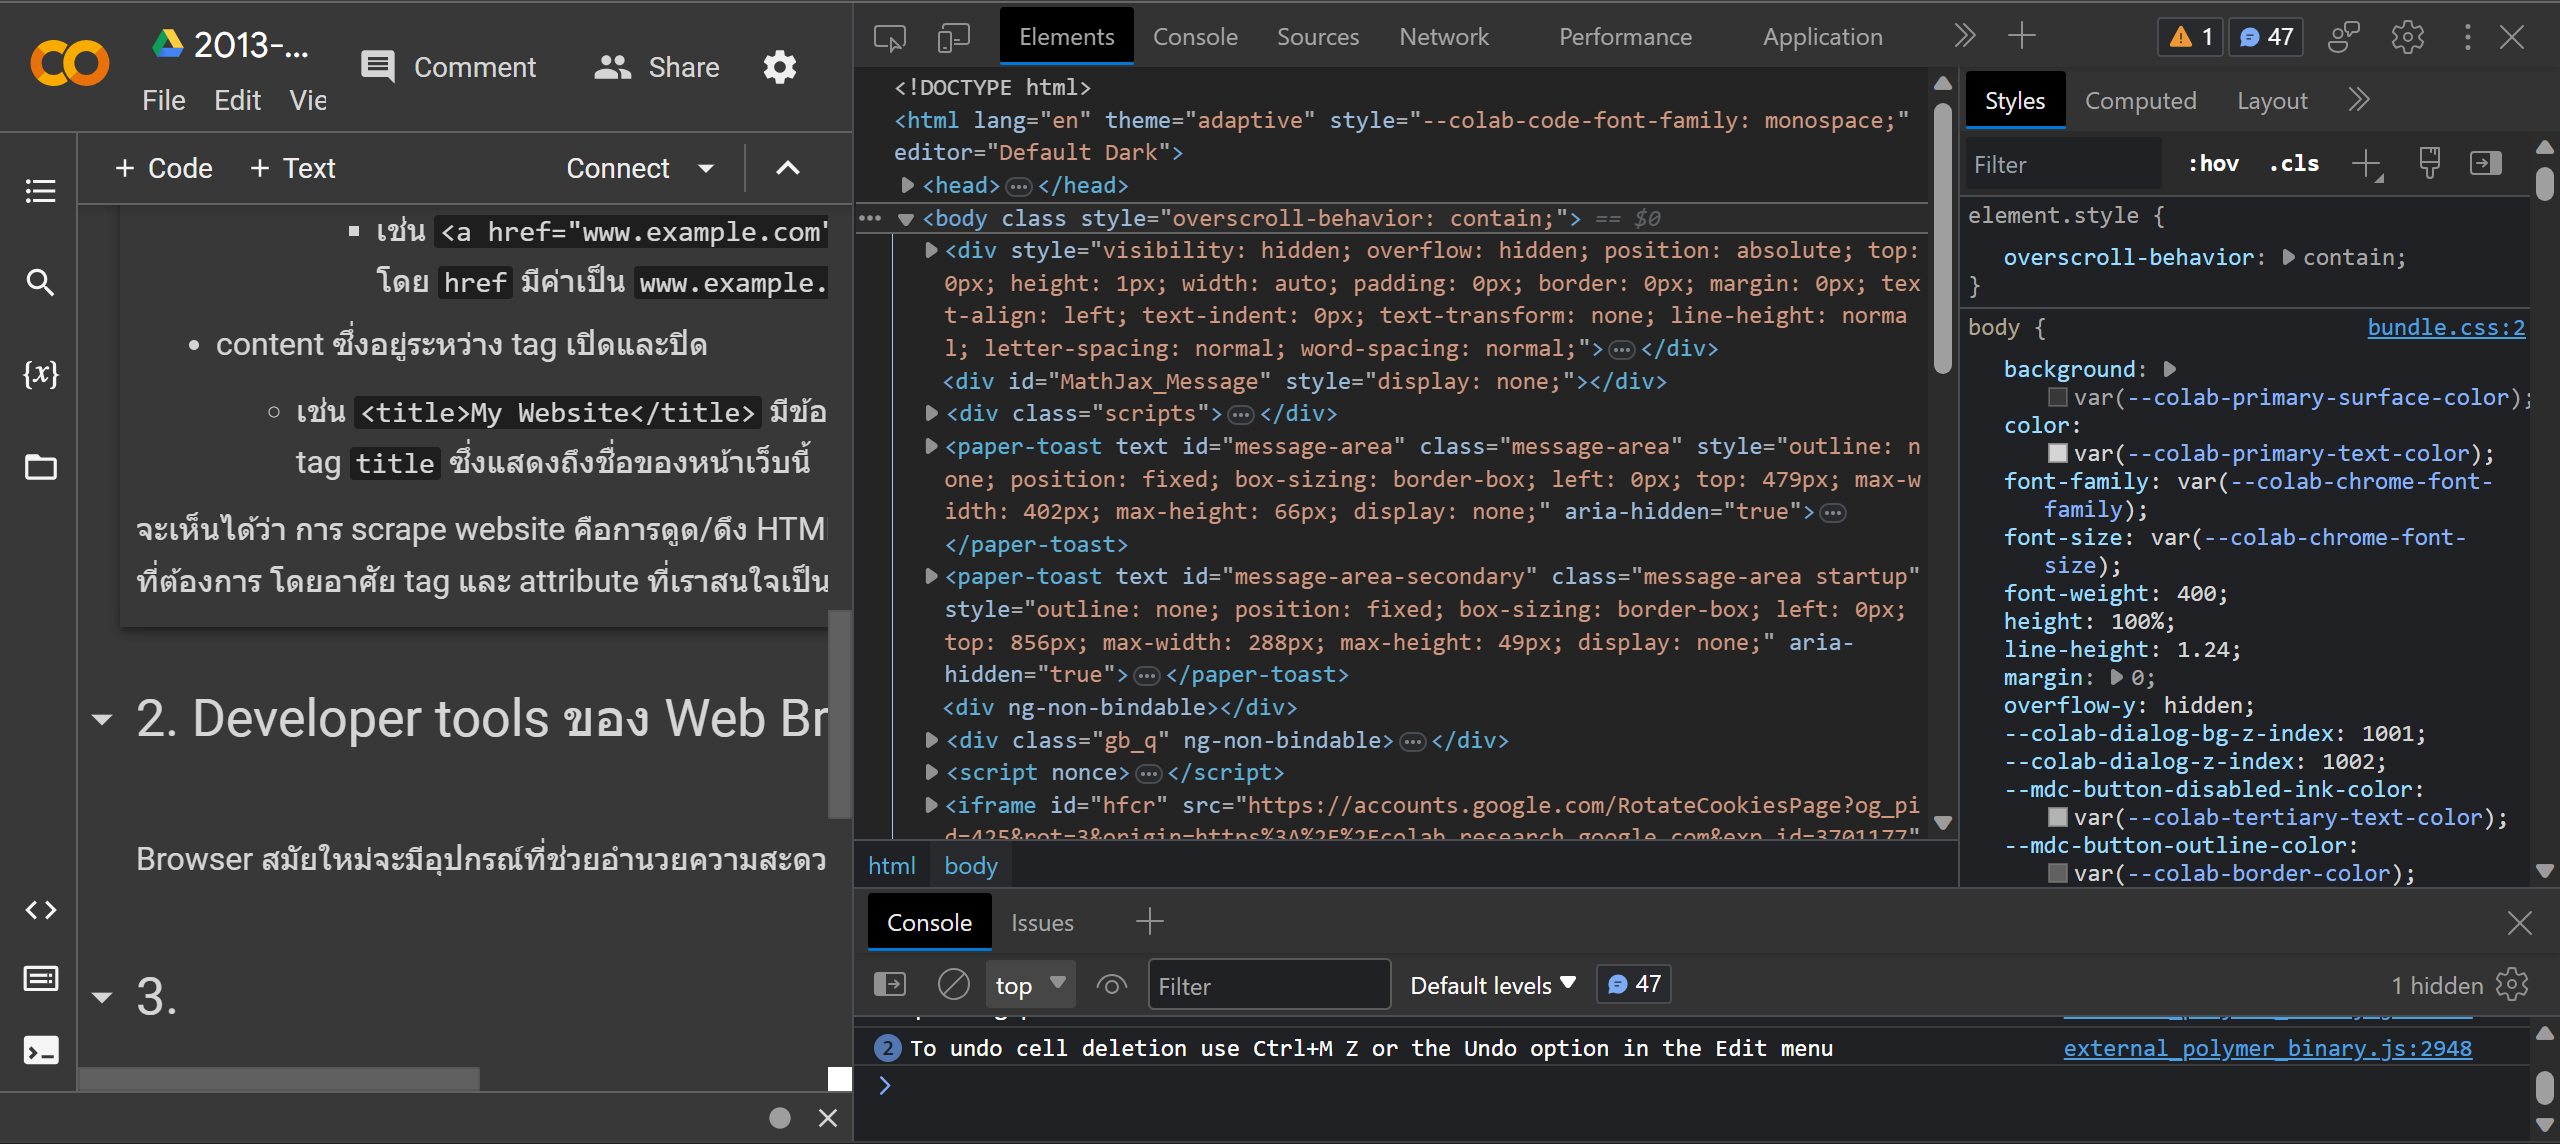

โดยทั่วไปแล้ว developer tools จะสามารถดูโครงสร้างของหน้าเว็บ ลองปรับแก้ค่าต่างๆ ของหน้าเว็บเพื่อดูการแสดงผลได้

สำหรับ web scraping นั้น เราจะอาศัย developer tools ช่วยในการหา tag และ attribute ของ content ที่เราสนใจ

เช่น
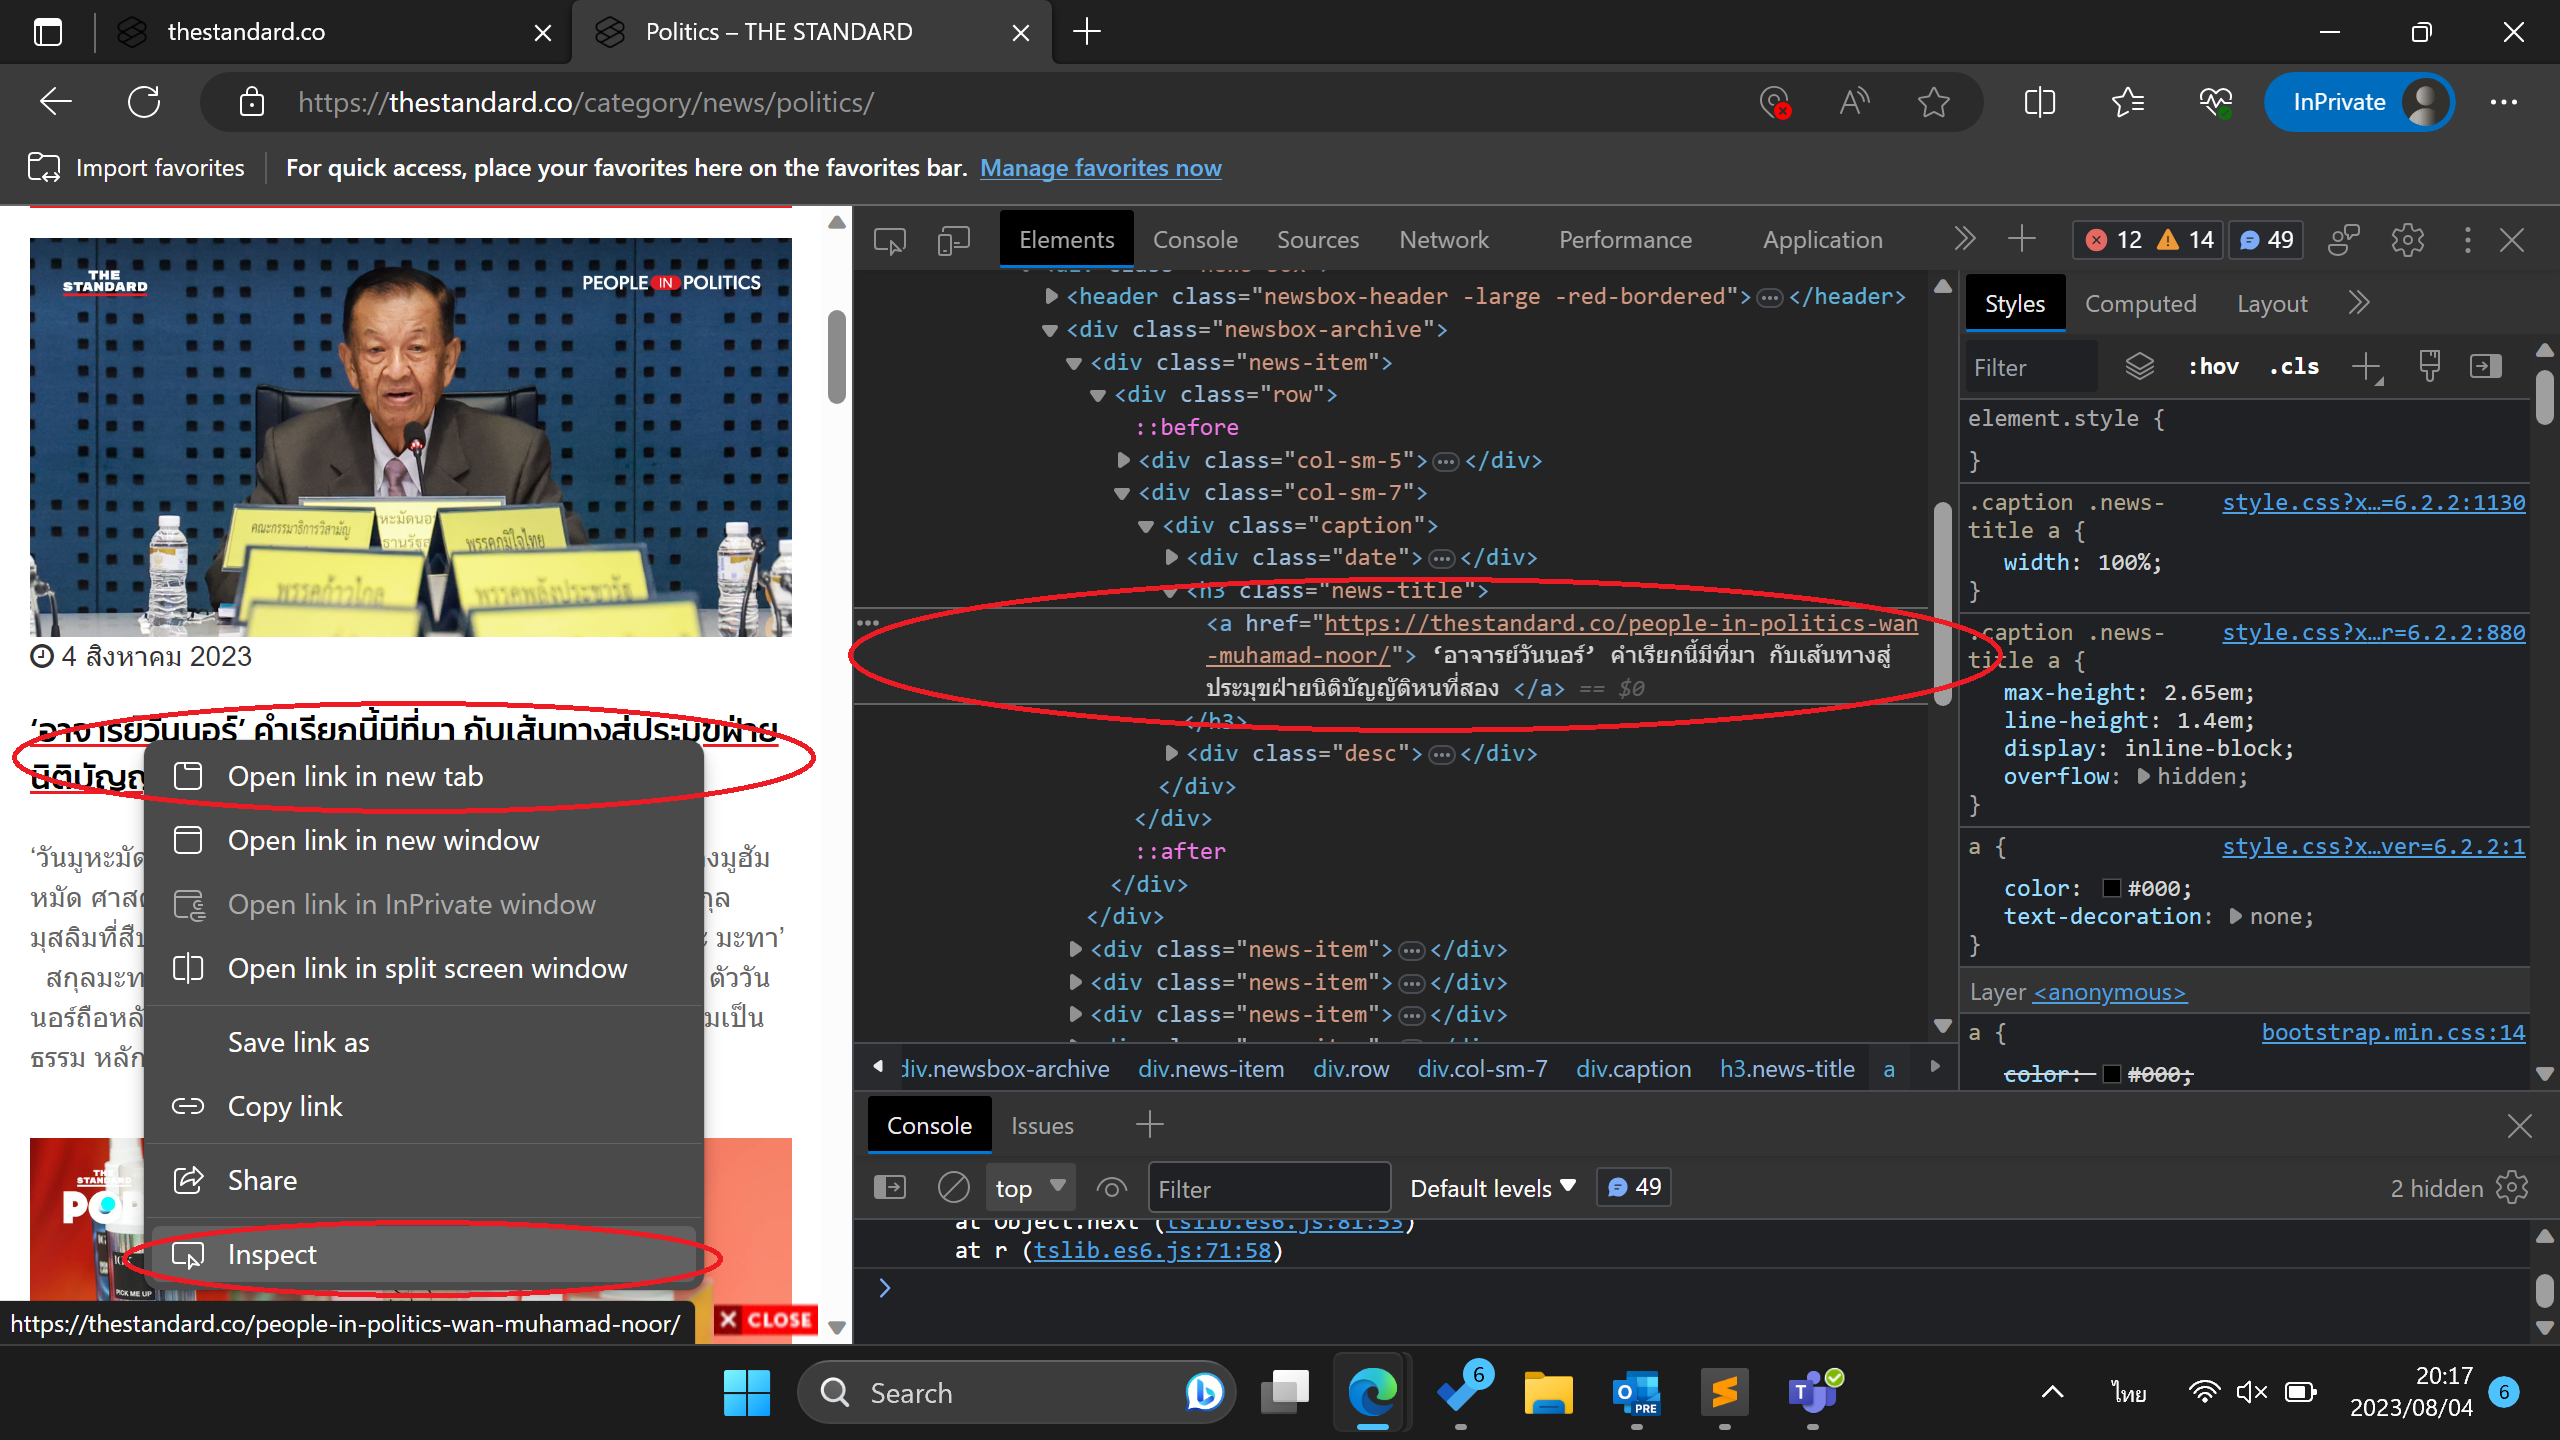

จากตัวอย่างด้านบน
1. คลิกขวาที่ content ที่ต้องการ ซึ่งในกรณีนี้คือหัวข้อข่าว/พาดหัวข่าว แล้วเลือก Inspect
2. ครึ่งด้านขวาของจอจะแสดง developer tools และ highlight ที่ตำแหน่งของตัว content ที่ต้องการ ซึ่งในกรณีนี้ พบว่าเป็น

    - `<a href="https://thestandard.co/people-in-politics-wan-muhamad-noor/">‘อาจารย์วันนอร์’ คำเรียกนี้มีที่มา กับเส้นทางสู่ประมุขฝ่ายนิติบัญญัติหนที่สอง </a>`

    - แสดงว่า
        - เป็น tag `a`
        - มี attribute `href` เป็น `https://thestandard.co/people-in-politics-wan-muhamad-noor/`
        - และ content คือ `‘อาจารย์วันนอร์’ คำเรียกนี้มีที่มา กับเส้นทางสู่ประมุขฝ่ายนิติบัญญัติหนที่สอง `

ซึ่งจริงๆ แล้ว หากเราสกัด tag `a` ออกมา เราจะพบว่า เราได้ link อื่นๆ ที่ไม่ใช่หัวข้อข่าวติดมาด้วย แต่จาก HTML ที่เราได้มา เราจะเห็นว่า tag `a` ที่เราต้องการนี้ อยู่ภายใต้ tag `<h3 class=news-title>` อีกต่อหนึ่ง

แสดงว่า เราควรสกัด tag `h3` ที่มี attribute `class` เป็น `news-title` เราจึงจะได้เฉพาะตัวหัวข้อข่าวออกมา

เนื้อหาส่วนอื่นๆ ก็ใช้วิธีทำนองเดียวกันในการเลือกสกัดข้อมูล

# 3. การสกัดเนื้อหาส่วนที่สนใจจากหน้าเว็บ (HTML page)

web scraping นั้นประกอบด้วยการดึงหน้า HTML มา จากนั้นจึงสกัดข้อมูลที่ต้องการจากหน้าเว็บ ดังนั้น เราจะใช้ library 2 ตัวช่วยในการทำงานทั้งสองนี้

1. `requests` ใช้เรียกข้อมูลหน้าเว็บ (HTML) มาจาก URL ที่ต้องกร
2. `BeautifuleSoup` ใช้สำหรับเลือกข้อมูลที่ต้องการจากโครงสร้าง HTML

In [ ]:
import requests
from bs4 import BeautifulSoup

## Simple example

ก่อนจะไปทดลองกับเว็บไซต์จริง เราจะมาทดลองใช้ `BeautifulSoup` กับ HTML ง่ายๆ กันก่อน

Ref: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [ ]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [ ]:
# ส่งข้อมูล html ให้ BeautifulSoup อ่านโครงสร้าง

soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

หลังจาก `BeautifulSoup` อ่านโครงสร้าง HTML แล้ว เราสามารถเลือกระบุ tag ที่ต้องการได้โดยตรง

In [ ]:
# เลือก tag title -> soup.title

In [ ]:
# ตัดเฉพาะ (text) content ใน tag title -> soup.title.text

In [ ]:
# เลือก tag a -> soup.a

In [ ]:
# แสดง attribute href ใน tag a -> soup.a['href']

จากตัวอย่าง HTML เรามี link มากกว่า 1 link แต่การระบุ tag โดยตรงจะคืนเฉพาะผลลัพธ์แรกมาให้ หากต้องการผลลัพธ์ทั้งหมด เราจะใช้ function `find_all`

In [ ]:
for link in soup.find_all('a'):
    print(link['href'])

## The Standard

ต้องการดึงข่าวทั้งหมดในหน้าแรกของ The Standard หมวด Politics

https://thestandard.co/category/news/politics/

In [ ]:
# ระบุ URL -> 'https://thestandard.co/category/news/politics/'

URL =

In [ ]:
# ส่ง request ขอหน้าเว็บที่ URL ที่กำหนด

page = requests.get(URL)
page.content

In [ ]:
# อ่านโครงสร้าง HTML ใน page.content

soup = BeautifulSoup(page.content, 'html.parser')

เลือก HTML tag `h3` ที่มี `class` เป็น `news-title`

In [ ]:
# soup.find_all('h3', {'class':'news-title'})

### การเก็บข้อมูลเพื่อนำไปใช้ต่อ

การนำข้อมูลไปวิเคราะห์ต่อนั้น เรามักจะทำงานกับข้อมูลที่เป็นตาราง เช่น csv file ดังนั้น หลังจากสกัดข้อมูลที่ต้องการแล้ว เราควรแปลงข้อมูลที่ได้เก็บไว้เพื่อให้ใช้งานต่อได้สะดวก

ตัวอย่างนี้ จะเก็บข้อมูล หัวข้อข่าว และ ลิงก์ ลงในตาราง csv

In [ ]:
# loop สำหรับทุกๆ title ที่ค้นเจอ
data = []
for title in soup.find_all('h3', {'class':'news-title'}):
    link = title.a['href']  # ดึงข้อมูล link จาก attribute href ของ tag a
    text = title.a.text     # ดึง content ใน tag a
    data.append([text, link])

In [ ]:
data

ใช้ libray `csv` ในการ save list ของข้อมูลที่ต้องการ

In [ ]:
import csv

In [ ]:
with open('mydata.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)            # สร้างตัวเขียนข้อมูล
    writer.writerow(['หัวข้อข่าว', 'link'])    # เขียนหัวตาราง
    writer.writerows(data)                  # เขียนบรรทัดที่เหลือทั้งหมด

# 4. การประมวลผลภาษาไทยเบื้องต้น

เราจะลองนับความถี่ของคำในข่าวเพื่อสร้าง Word Cloud ดู

ขั้นตอนการทำงานจะประกอบด้วย
1. ตัดคำ
    - สำหรับภาษาไทย จะใช้ library `pythainlp` เป็นหลัก
2. สร้าง Word Cloud จาก set ของคำที่ตัดได้
    - ใช้ library `wordcloud`
    - ใช้ library `matplotlib` เพื่อปรับค่าต่างๆ ของกราฟ WordCloud

In [ ]:
# เนื่องจาก pythainlp ไม่ได้ติดตั้งมาใน colab จึงต้อง install เอง

!pip install pythainlp

## ตัดคำ

In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
for title, link in data:
    print(word_tokenize(title))

## นับความถี่

In [ ]:
from pythainlp.util import rank

In [ ]:
all_text = []
for title, link in data:
    all_text += word_tokenize(title.strip())

# stop words คือคำที่ไม่ใช่ content word เช่น เป็น อยู่ คือ ที่ ซึ่งมักจะมีความถี่สูง แต่ไม่มีประโยชน์ในการนำมาวิเคราะห์ต่อ เราจึงมักตัดทิ้งไป ไม่เอามานับความถี่
freq = rank(all_text, exclude_stopwords=True)

In [ ]:
freq

## สร้าง word cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

เนื่องจากการ plot ปกติจะใช้ font ซึ่งไม่สามารถแสดงภาษาไทยได้ จึงต้อง download font ภาษาไทย แล้วไปบังคับให้แสดงผลข้อความด้วย font ภาษาไทย

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf',
                      width=800,
                      height=800,
                      min_font_size=10,
                      background_color='white').generate_from_frequencies(freq)
plt.figure(figsize = (15,15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# แบบฝึกหัด

ลองเปลี่ยนจากการสกัดหัวข้อข่าว เป็นตัวเนื้อข่าวช่วงต้น (`desc`) แล้วลองทำซ้ำการสร้าง word cloud ดู